In [1]:
import pandas as pd
import IPython.display as ipd
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc
import python_speech_features as psf
from python_speech_features import logfbank
import librosa
from scipy.io import wavfile

In [2]:
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False, 
                         sharey=True, figsize=(20, 5))
    fig.suptitle('Time Series', size=16, y=1.02)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i+=1

def plot_fft(fft):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False, 
                         sharey=True, figsize=(20, 5))
    fig.suptitle('Fourier Transforms', size=16, y=1.02)
    i = 0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i+=1

def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False, 
                         sharey=True, figsize=(20, 5))
    fig.suptitle('Mel Cepstrum Coefficients', size=16, y=1.02)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                        cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i+=1

def plot_fbank(fbanks):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False, 
                         sharey=True, figsize=(20, 5))
    fig.suptitle('Filter Bank Coefficients', size=16, y=1.02)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbanks.keys())[i])
            axes[x,y].imshow(list(fbanks.values())[i],
                        cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i+=1

def calc_fft(y, rate):
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1/rate)
    Y = abs(np.fft.rfft(y)/n)
    return (Y,freq)

def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10), min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask


In [3]:
train = pd.read_csv('Train.csv')
train.head()

,fn,label
0,audio_files/IV38R7F.wav,akawuka
1,audio_files/KM4SKWT.wav,banana
2,audio_files/F5POSU9.wav,obulwadde
3,audio_files/MMVDXG2.wav,nnyaanya
4,audio_files/9TVM96F.wav,pampu


In [4]:
train.columns

Index(['fn', 'label'], dtype='object')

In [5]:
#Check the distribution of each agricultural keywowords
train.set_index('fn',inplace=True)
for x in train.index:
    rate, signal =wavfile.read('C:/Users/DELL/Desktop/Hackhathons/GIZ/'+x)
    #calculate the length of each audio signals
    train.at[x, 'length']= signal.shape[0]/rate

In [6]:
train.head()

,label,length
fn,,
audio_files/IV38R7F.wav,akawuka,2.460000
audio_files/KM4SKWT.wav,banana,2.506168
audio_files/F5POSU9.wav,obulwadde,2.497460
audio_files/MMVDXG2.wav,nnyaanya,2.460000
audio_files/9TVM96F.wav,pampu,2.520000


In [7]:
#Class distribution
classes = list(np.unique(train.label))
class_distribution = train.groupby(['label'])['length'].mean()

In [8]:
class_distribution.head()

label
Pump           2.460000
Spinach        2.493175
abalimi        2.460000
afukirira      2.460000
agriculture    2.460000
Name: length, dtype: float64

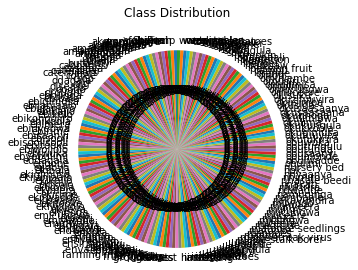

In [9]:
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()
train.reset_index(inplace=True)

In [10]:
train['label'].value_counts().head()

ebigimusa       12
ensiringanyi    11
ndwadde         11
endwadde        11
ebiwuka         11
Name: label, dtype: int64

In [11]:
def calc_fft(y, rate):
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1/rate)
    Y = abs(np.fft.rfft(y)/n)
    return (Y,freq)

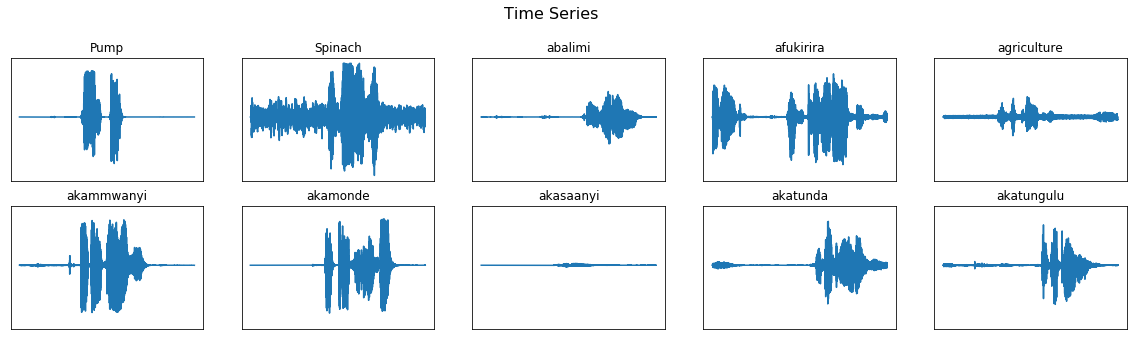

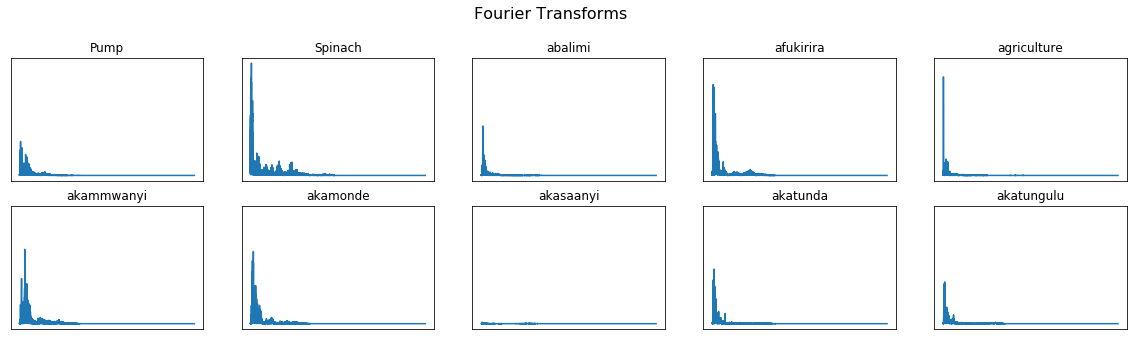

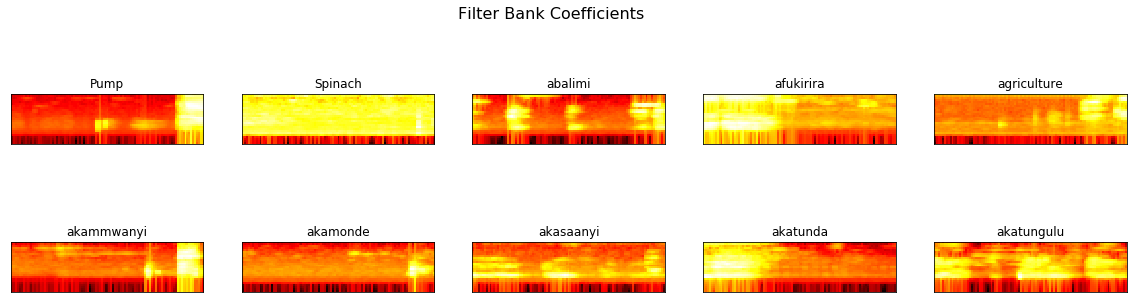

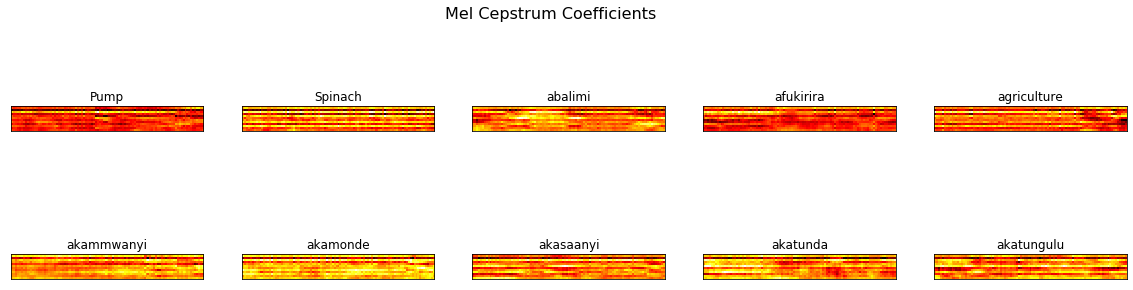

In [12]:
signals={}
fft ={}
fbank={}
mfccs={}
for c in classes:
    wav_file=train[train['label'] == c].iloc[0,0]
    signal, rate =librosa.load('C:/Users/DELL/Desktop/Hackhathons/GIZ/'+wav_file, sr=44100)

    signals[c]= signal
    fft[c]= calc_fft(signal, rate)
    
    bank = logfbank(signal[:rate], rate,nfilt=26, nfft=1103).T
    fbank[c] = bank
    
    mel = mfcc(signal[:rate], samplerate=rate,numcep=13, nfilt=26, nfft=1103).T
    mfccs[c] = mel
    
plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

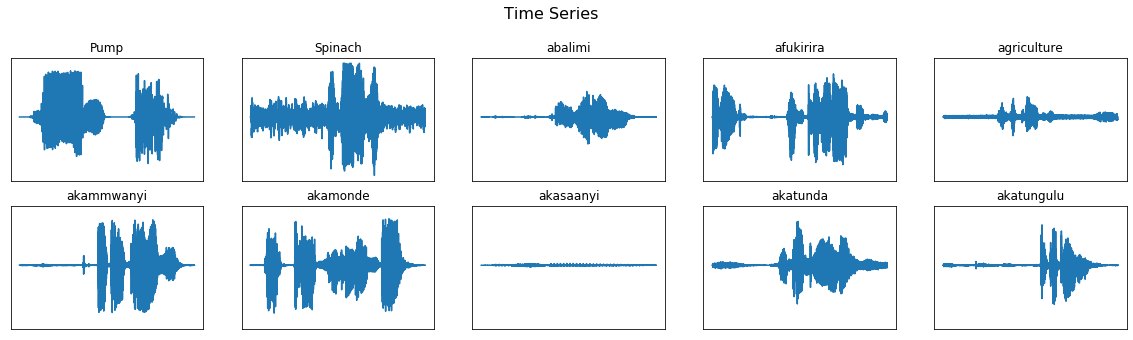

In [13]:
#To remove the dead space in the audio lets calculate for the envelope of a signal
signals={}
for c in classes:
    wav_file=train[train['label'] == c].iloc[0,0]
    signal, rate =librosa.load('C:/Users/DELL/Desktop/Hackhathons/GIZ/'+wav_file, sr=44100)
 
    mask = envelope(signal, rate, 0.0005)#tune threshold
    signal =signal[mask]
    signals[c]= signal
     
plot_signals(signals)
plt.show()

In [15]:
train.shape

(1109, 3)

In [16]:
# Show a sample to listen to
ipd.Audio(train.fn.sample().values[0])

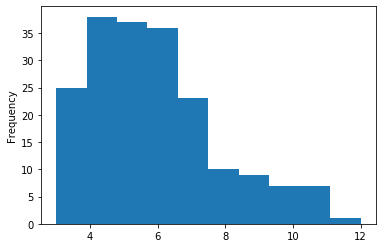

In [18]:
# Plot a histogram showing how common different counts are
train.groupby('label').count()['fn'].plot(kind='hist')

In [19]:
train.groupby('label').count()['fn'].min()

3